# Chapter 2 - Machine Learning using Regression Models. 

## Project: Car Price Predicator.

In [1]:
# Importing python packages

# Data manipulation packages
import numpy as np
import pandas as pd

# Data Visualization Pactages
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizer code
%matplotlib inline 

## Data Gathering. 

In [2]:
# Loading dataset.
car = pd.read_csv('data/data.csv')

# Viewing dataset
car.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Data Assessment.

In [3]:
# Data Summary 
car.sample(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
552,FIAT,500,2015,premium unleaded (recommended),101.0,4.0,MANUAL,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,40,31,819,16845
5093,Infiniti,G Coupe,2012,premium unleaded (recommended),330.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Midsize,Coupe,25,17,190,44200
4928,Ford,Freestyle,2005,regular unleaded,203.0,6.0,AUTOMATIC,front wheel drive,4.0,Crossover,Large,Wagon,25,18,5657,28440
3982,Buick,Envision,2017,flex-fuel (unleaded/E85),197.0,4.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Flex Fuel",Midsize,4dr SUV,29,22,155,35870
3790,Mitsubishi,Eclipse,2012,regular unleaded,162.0,4.0,AUTOMATIC,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,28,20,436,24699
573,FIAT,500L,2015,premium unleaded (recommended),160.0,4.0,MANUAL,front wheel drive,4.0,NaN,Compact,Wagon,33,25,819,21695
11302,Hyundai,Veracruz,2011,regular unleaded,260.0,6.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,21,16,1439,30245
8269,Land Rover,Range Rover Evoque,2017,premium unleaded (recommended),240.0,4.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury",Compact,4dr SUV,29,21,258,54200
1913,Volkswagen,Beetle,2015,regular unleaded,170.0,4.0,AUTOMATIC,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,33,25,873,24705
760,BMW,8 Series,1995,regular unleaded,322.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Luxury,Performance",Midsize,Coupe,19,12,3916,5858


In [4]:
# Viewing the data shape. 
print(f"There are {car.shape[0]} rows and {car.shape[1]} columns in the car dataset")

There are 11914 rows and 16 columns in the car dataset


In [5]:
# Columns in the dataset
car.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [6]:
# Data structure 
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
# checking unique values from each data set
car_float = car.columns[car.dtypes == "float64"]

for col in car_float: 
    print(f"{col}\n")
    print(f"{car[col].unique()}\n\n")
    
car_object = car.columns[car.dtypes == "object"]

for col in car_object: 
    print(f"{col}\n")
    print(f"{car[col].unique()}\n\n")

car_int = car.columns[car.dtypes == "int64"]

for col in car_int: 
    print(f"{col}\n")
    print(f"{car[col].unique()}\n\n")


Engine HP

[ 335.  300.  230.  320.  172.  160.  130.  158.  240.  248.  162.  217.
  184.  295.  115.  140.  155.  114.  100.  241.  180.  177.  228.  121.
  148.  194.  218.  161.  292.  250.  255.  222.   82.  134.  306.  400.
  425.  350.  332.  268.  282.  275.  201.  442.  562.  597.  237.  270.
  445.  443.  302.  322.  315.   nan  101.  135.  485.  238.  515.  543.
  631.  604.  620.  611.  661.  157.  402.  389.  110.  532.  170.  165.
  125.  641.  535.  153.  144.  188.  372.  108.  168.  190.  205.  200.
  227.  173.  220.  210.  280.  207.  265.  260.  290.  285.  390.  225.
  185.  150.  430.  520.  560.  475.  500.  540.  370.  580.  420.  345.
  195.  193.  208.  181.  236.  186.  252.  310.  333.  340.  450.  281.
  288.  138.  137.  106.  271.  196.  212.  278.  189.  480.  152.  600.
  375.  198.  182.  179.  264.  503.  456.  317.  235.  385.  303.   63.
  321.  272.  464.  202.  215.  283.  700.  720.  750.  107.  293.  119.
  143.  245.  120.  337.  276.  330.  13

In [8]:
# Checking for None vulues in the dataset.
car.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

### Data Assessment Observation: 
- Column names needs to be renamed and replace all space with _
- Converting all object to lower case and replacing spaces with _ 
- Converting data type
- replacing none values 

## Data Cleaning

### 1. Renaming all columns by removing space and upper case.

In [9]:
# Renaming columns with cap and space. 

# Checking the columns name 
print(car.columns)

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')


In [10]:
# Renamin columns
col_name = car.columns.str.lower()

# Removing sma
col_name = col_name.str.replace(" ", "_")

# Renaming column name 
car.columns = col_name

# checking to see changes
car.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

### 2. Removing space and upper case from objuct strings

In [11]:
# Removing space and cap from object variable. 

# Columns with object strings 
car_object = car_object.str.lower().str.replace(' ', '_')

car_object

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [12]:
# Creating a loop to remove upper cap
# raplace space with _ . 
for col in car_object: 
    car[col] = car[col].str.lower().str.replace(" ", "_")
    
# Checking for changes made. 
car[car_object].head()

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
0,bmw,1_series_m,premium_unleaded_(required),manual,rear_wheel_drive,"factory_tuner,luxury,high-performance",compact,coupe
1,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"luxury,performance",compact,convertible
2,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"luxury,high-performance",compact,coupe
3,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"luxury,performance",compact,coupe
4,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,luxury,compact,convertible


### 3. Filling or Removing none values. 

In [13]:
# Checking columns with none values. 
none_col = car.columns[car.isna().any().values].to_list()
none_col

['engine_fuel_type',
 'engine_hp',
 'engine_cylinders',
 'number_of_doors',
 'market_category']

In [14]:
# Replacing none value with mean value. 

# Checking the make up of columns
for i in range(len(none_col)):
    print(none_col[i], "\n")
    print(car[none_col[i]][0:6], '\n\n')

engine_fuel_type 

0    premium_unleaded_(required)
1    premium_unleaded_(required)
2    premium_unleaded_(required)
3    premium_unleaded_(required)
4    premium_unleaded_(required)
5    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object 


engine_hp 

0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
5    230.0
Name: engine_hp, dtype: float64 


engine_cylinders 

0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
5    6.0
Name: engine_cylinders, dtype: float64 


number_of_doors 

0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
5    2.0
Name: number_of_doors, dtype: float64 


market_category 

0    factory_tuner,luxury,high-performance
1                       luxury,performance
2                  luxury,high-performance
3                       luxury,performance
4                                   luxury
5                       luxury,performance
Name: market_category, dtype: object 




In [15]:
# Number of none values in each column
car[none_col].isnull().sum()

engine_fuel_type       3
engine_hp             69
engine_cylinders      30
number_of_doors        6
market_category     3742
dtype: int64

In [16]:
# most frequent engine fuel
car[none_col[0]].value_counts()


regular_unleaded                                7172
premium_unleaded_(required)                     2009
premium_unleaded_(recommended)                  1523
flex-fuel_(unleaded/e85)                         899
diesel                                           154
electric                                          66
flex-fuel_(premium_unleaded_required/e85)         54
flex-fuel_(premium_unleaded_recommended/e85)      26
flex-fuel_(unleaded/natural_gas)                   6
natural_gas                                        2
Name: engine_fuel_type, dtype: int64

In [17]:
# filing null with most frequent
car.engine_fuel_type = car.engine_fuel_type.fillna('regular_unleaded')

# Checking for null
car.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        0
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [18]:
# engine_hp mean value
car['engine_hp'].mean()

249.38607007176023

In [19]:
# Filling null with mean 
car['engine_hp'] = car['engine_hp'].fillna(249.39)

In [20]:
# Checking null values 
car['engine_hp'].isna().any()

False

In [21]:
# engine_hp mean value
car['engine_hp'].mean()


249.38609283196197

In [22]:
# Mean value of engine_cylinders
car.engine_cylinders.mean()

5.628828677213059

In [23]:
car.engine_cylinders.value_counts()

4.0     4752
6.0     4489
8.0     2031
12.0     230
5.0      225
10.0      68
0.0       56
3.0       30
16.0       3
Name: engine_cylinders, dtype: int64

In [24]:
# filling null value.
car['engine_cylinders'] = car['engine_cylinders'].fillna(4.0)

In [25]:
# Checking for null value. 
car.engine_cylinders.isna().any()

False

In [26]:
# checking for column distribution. 
car.number_of_doors.value_counts()

4.0    8353
2.0    3160
3.0     395
Name: number_of_doors, dtype: int64

In [27]:
# filling null value
car['number_of_doors'] = car['number_of_doors'].fillna(4.0)

In [28]:
# checking null values.
car.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        0
engine_hp               0
engine_cylinders        0
transmission_type       0
driven_wheels           0
number_of_doors         0
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### 4. Converting data type. 

In [29]:
# Chacking the data type available.
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11914 non-null  object 
 4   engine_hp          11914 non-null  float64
 5   engine_cylinders   11914 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11914 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [30]:
# Reformating float as int

# Columns with float.
car_float = car_float.str.lower().str.replace(' ', '_')

car_float

Index(['engine_hp', 'engine_cylinders', 'number_of_doors'], dtype='object')

In [31]:
car[car_float] 

,engine_hp,engine_cylinders,number_of_doors
0,335.0,6.0,2.0
1,300.0,6.0,2.0
2,300.0,6.0,2.0
3,230.0,6.0,2.0
4,230.0,6.0,2.0
...,...,...,...
11909,300.0,6.0,4.0
11910,300.0,6.0,4.0
11911,300.0,6.0,4.0
11912,300.0,6.0,4.0


In [32]:
# list of float columns 
float_list = car_float.to_list()

# For loop to convert to int
for col in float_list: 
    car[col] = car[col].astype(int)
    print(col, '\n')
    print(car[col].dtypes, "\n\n")

engine_hp 

int32 


engine_cylinders 

int32 


number_of_doors 

int32 




## Exploratory Data Analysis. 

In [33]:
# Viewing the data structure of the data.
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   make               11914 non-null  object
 1   model              11914 non-null  object
 2   year               11914 non-null  int64 
 3   engine_fuel_type   11914 non-null  object
 4   engine_hp          11914 non-null  int32 
 5   engine_cylinders   11914 non-null  int32 
 6   transmission_type  11914 non-null  object
 7   driven_wheels      11914 non-null  object
 8   number_of_doors    11914 non-null  int32 
 9   market_category    8172 non-null   object
 10  vehicle_size       11914 non-null  object
 11  vehicle_style      11914 non-null  object
 12  highway_mpg        11914 non-null  int64 
 13  city_mpg           11914 non-null  int64 
 14  popularity         11914 non-null  int64 
 15  msrp               11914 non-null  int64 
dtypes: int32(3), int64(5), object(8)
memory 

In [34]:
# Statistical view of dataset. 
car.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.383834,5.624727,3.436377,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,108.875196,1.780189,0.881184,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [35]:
# Viewing the unique values in features.

# List of columns in the data 
col_list = car.columns.to_list()

# Creating for loop for to print unique values.
for col in col_list: 
    print(f"Column Name: {col}\n")
    print(f"First 5 Unique Values: {car[col].unique()[0:5]}\n")
    print(f"Number of Unique Values: {car[col].nunique()}\n\n")

Column Name: make

First 5 Unique Values: ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']

Number of Unique Values: 48


Column Name: model

First 5 Unique Values: ['1_series_m' '1_series' '100' '124_spider' '190-class']

Number of Unique Values: 914


Column Name: year

First 5 Unique Values: [2011 2012 2013 1992 1993]

Number of Unique Values: 28


Column Name: engine_fuel_type

First 5 Unique Values: ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']

Number of Unique Values: 10


Column Name: engine_hp

First 5 Unique Values: [335 300 230 320 172]

Number of Unique Values: 357


Column Name: engine_cylinders

First 5 Unique Values: [ 6  4  5  8 12]

Number of Unique Values: 9


Column Name: transmission_type

First 5 Unique Values: ['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']

Number of Unique Values: 5


Column Name: driven_wheels

First 5 Unique Values: ['rear_wheel_drive' 'front_wheel_dr

In [36]:
#Log statistics of the MSRP. 
np.log10(car['msrp'].describe())

count    4.076058
mean     4.608470
std      4.778940
min      3.301030
25%      4.322219
50%      4.477049
75%      4.625634
max      6.315110
Name: msrp, dtype: float64

<Figure size 1500x500 with 0 Axes>

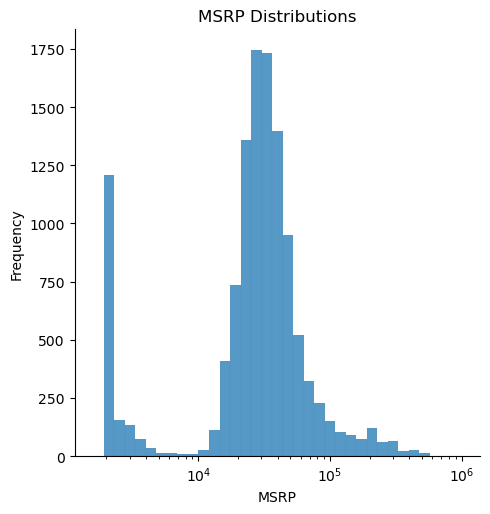

In [37]:
# Plotting the distribution of msrp.

# Plot size. 
plt.figure(figsize = (15,5))

# Setting bin size.
bins = 10 ** np.arange(3.2, 6.0 + 0.08, 0.08)

# Plotting Bar Chart with seaborn. 
sns.displot(car['msrp'], bins = bins)
plt.xscale('log')

# Plot Annotations 
plt.title('MSRP Distributions')
plt.xlabel("MSRP")
plt.ylabel("Frequency");

## Setting Up Model Validation Framework. 

In [38]:
# Setting the proportion for each 
# our three dataset.

# Total number of records. 
n = len(car)

# Proportion for Slitting 
n_training = int(n * 0.6)
n_val = int(n * 0.2)
n_testing = int(n * 0.2)

# Checktng the proportions and total record.
n, n_training + n_val + n_testing

(11914, 11912)

In [39]:
# Setting up random seed and reshuffling data.

# Extracting total number of index. 
idx = np.arange(len(car))

# Setting up random seed value.
np.random.seed(5)

# Reshuffling dataset index. 
np.random.shuffle(idx)

# Checking index values
idx[:10]

array([ 3863,  7113,   917,  3833,  1312,   487,   701,  3784,   814,
       10281])

In [40]:
# Dividing the dataset using iloc
car_training = car.iloc[idx[:n_training]]
car_val = car.iloc[idx[n_training : n_val + n_training]]
car_testing = car.iloc[idx[n_val + n_training:]]

# Checking each dataset. 
print(car_training.head())
print(car_val.head())
print(car_testing.head())

         make          model  year                engine_fuel_type  engine_hp  \
3863  hyundai        elantra  2016                regular_unleaded        173   
7113    mazda     mx-5_miata  2015  premium_unleaded_(recommended)        167   
917      audi             90  1995                regular_unleaded        172   
3833  hyundai  elantra_coupe  2013                regular_unleaded        145   
1312   suzuki          aerio  2005                regular_unleaded        155   

      engine_cylinders transmission_type      driven_wheels  number_of_doors  \
3863                 4         automatic  front_wheel_drive                4   
7113                 4            manual   rear_wheel_drive                2   
917                  6            manual    all_wheel_drive                4   
3833                 4         automatic  front_wheel_drive                2   
1312                 4         automatic  front_wheel_drive                4   

     market_category vehicle_siz

In [41]:
# Extracting tarket Variables. 
y_training = car_training.msrp
y_val = car_val.msrp
y_testing = car_testing.msrp

# Deleting y column from dataset.
del car_training['msrp']
del car_val['msrp']
del car_testing['msrp']

In [46]:
# Checking for track varible in dataset. 
print(car_training.columns,'\n\n')
print(car_val.columns,'\n\n')
print(car_testing.columns,'\n\n')

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object') 


Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object') 


Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object') 




## Linear Regression Model. 

In [49]:
ones = np.ones(car_training.shape[0])
ones

x = np.column_stack([ones, car_training])

In [52]:
x

array([[1.0, 'hyundai', 'elantra', ..., 35, 24, 1439],
       [1.0, 'mazda', 'mx-5_miata', ..., 28, 22, 586],
       [1.0, 'audi', '90', ..., 23, 17, 3105],
       ...,
       [1.0, 'infiniti', 'm', ..., 24, 17, 190],
       [1.0, 'subaru', 'brz', ..., 29, 21, 640],
       [1.0, 'cadillac', 'ats', ..., 28, 18, 1624]], dtype=object)